In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
df1 = pd.read_csv("Dataset 1.csv")

In [6]:
df2 = pd.read_csv("Dataset 2.csv")
df3 = pd.read_csv("Dataset 3.csv")
df4 = pd.read_csv("Dataset 4.csv")
df5 = pd.read_csv("Dataset 5.csv")

In [7]:
df3 = df3[~(df3['age'] <= 15)]  

In [8]:
bins = np.arange(0,df3['age'].max() + 10, 10)
df3['age_bins'] = pd.cut(df3['age'], bins)

In [9]:
df3['expenditure_over_income'] = (df3.expenditure*12 / (df3.income*10000))

In [10]:
df3.card = pd.Series(np.where(df3.card.values == 'yes', 1, 0))
df3.age  = df3.age.round(decimals=0)
df3.expenditure  = df3.expenditure.round(decimals=2)
df3.owner = pd.Series(np.where(df3.owner.values == 'yes', 1, 0))
df3.selfemp = pd.Series(np.where(df3.selfemp.values == 'yes', 1, 0))

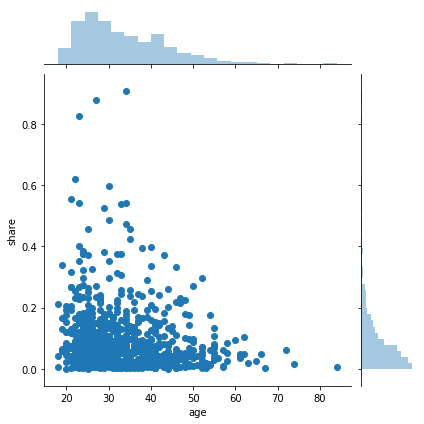

In [11]:
sns.jointplot(x='age', y='share', data=df3[(df3['card'] > 0) &  (df3['expenditure'] > 0)])

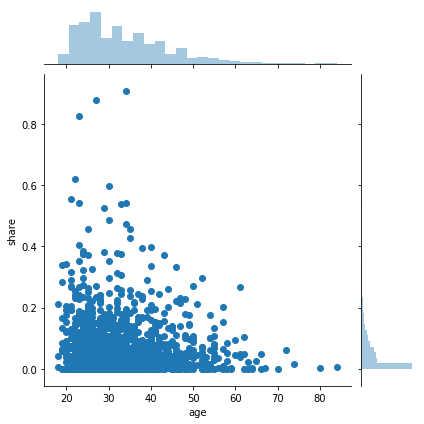

In [12]:
sns.jointplot(x='age', y='share', data=df3)

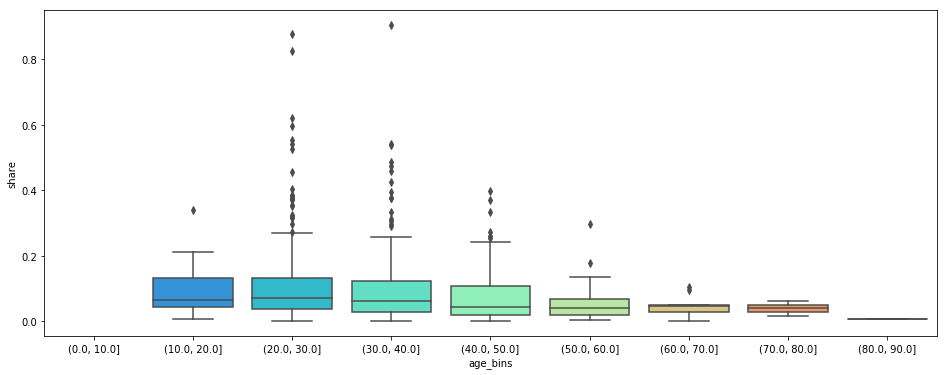

In [13]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='age_bins',y='share',data=df3[(df3['card'] == 1) & (df3['expenditure'] > 0)],palette='rainbow')

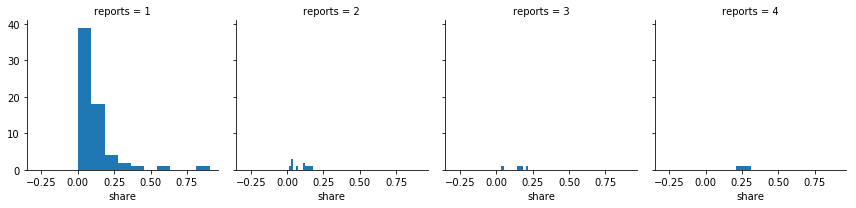

In [14]:
g = sns.FacetGrid(data=df3[(df3['card'] == 1) & (df3['expenditure'] > 0) & (df3['reports'] > 0)],col='reports')
g.map(plt.hist,'share')

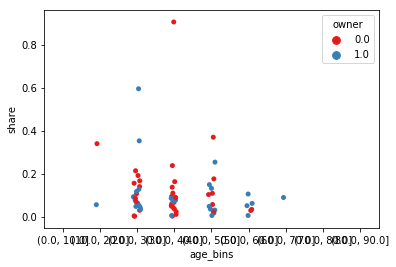

In [15]:
sns.stripplot(x="age_bins", y="share", data=df3[(df3['card'] == 1) & (df3['expenditure'] > 0) & (df3['reports'] == 1)],jitter=True,hue='owner',palette='Set1')


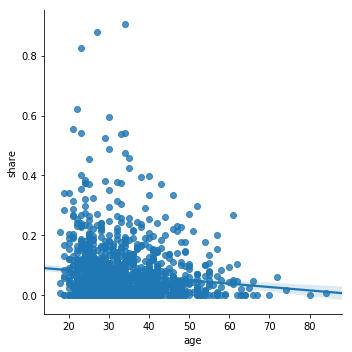

In [16]:
sns.lmplot(x='age',y='share',data=df3)

# SVM

Derogatory - will it get at least 1 report

In [17]:
df3.reports = pd.Series(np.where(df3.reports.values == 0, 0, 1))

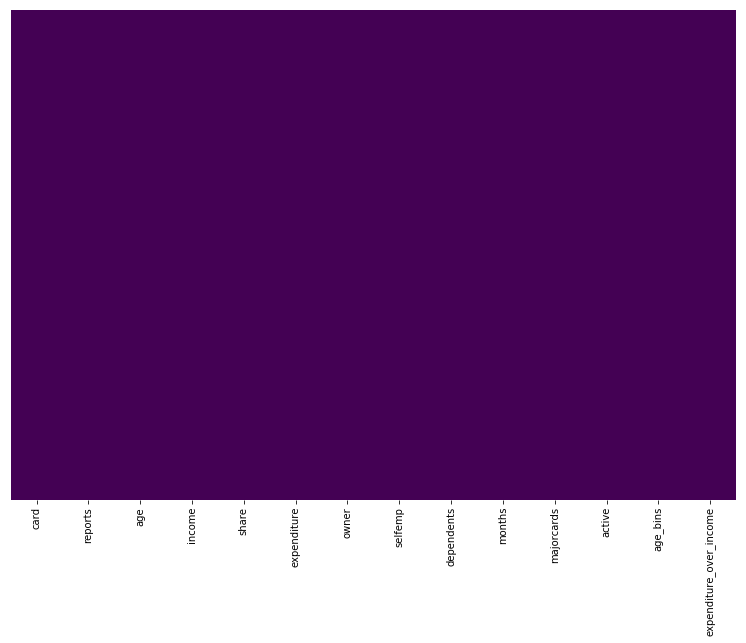

In [25]:
plt.figure(figsize=(13,9))
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
df3.dropna(inplace=True)

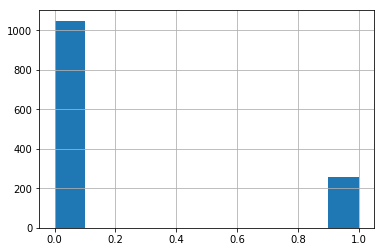

In [27]:
df3.reports.hist()

In [33]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [34]:
X = df3.drop(['card', 'age_bins'], axis=1)
y = df3['card']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



	              precision    recall  f1-score   support

         0.0       0.31      0.32      0.32        75
         1.0       0.80      0.79      0.79       252

   micro avg       0.68      0.68      0.68       327
   macro avg       0.55      0.55      0.55       327
weighted avg       0.68      0.68      0.68       327



Text(0.5, 15.0, 'Predicted label')

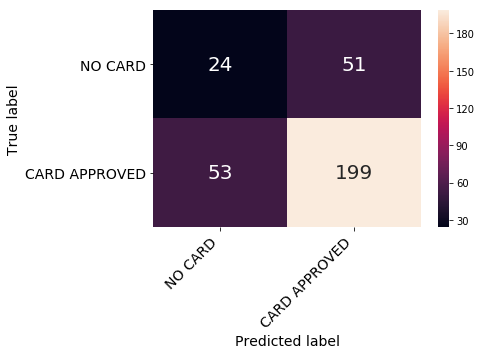

In [36]:


dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(f"\n\t{classification_report(y_test, predictions)}")
cfm = confusion_matrix(y_test, predictions)
confusion_matrix_df = pd.DataFrame(cfm, ('NO CARD', 'CARD APPROVED'), ('NO CARD', 'CARD APPROVED'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)



	              precision    recall  f1-score   support

         0.0       0.57      0.31      0.40        75
         1.0       0.82      0.93      0.87       252

   micro avg       0.79      0.79      0.79       327
   macro avg       0.70      0.62      0.64       327
weighted avg       0.76      0.79      0.76       327



Text(0.5, 15.0, 'Predicted label')

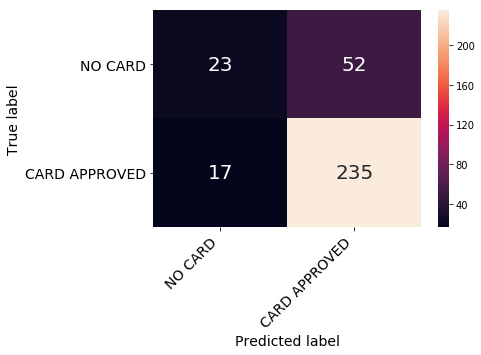

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(f"\n\t{classification_report(y_test, rfc_pred)}")
cfm = confusion_matrix(y_test, rfc_pred)
confusion_matrix_df = pd.DataFrame(cfm, ('NO CARD', 'CARD APPROVED'), ('NO CARD', 'CARD APPROVED'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

In [86]:
from sklearn import tree
tree.export_graphviz(rfc) 

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [45]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

# DATASET 4

In [51]:
df4.columns = df4.columns.str.replace(' ', '')

In [82]:
df4.head()
df4 = df4[~(df4['age'] <= 15)]  
bins = np.arange(0,df4['age'].max() + 10, 10)
df3['age_bins'] = pd.cut(df4['age'], bins)

In [56]:
df4.columns

Index(['status_checking', 'loan_duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_amt', 'emp_years', 'percent_disp_income',
       'status_sex', 'other_debts', 'residence_since', 'property', 'age',
       'other_installments', 'housing_status', 'num_credits', 'job_type',
       'num_dependant', 'own_telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

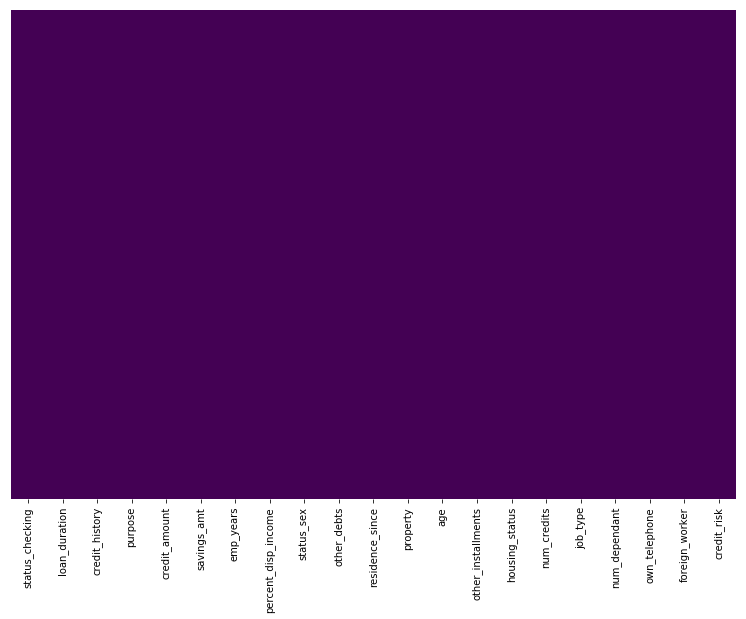

In [54]:
plt.figure(figsize=(13,9))
sns.heatmap(df4.isnull(),yticklabels=False,cbar=False,cmap='viridis')

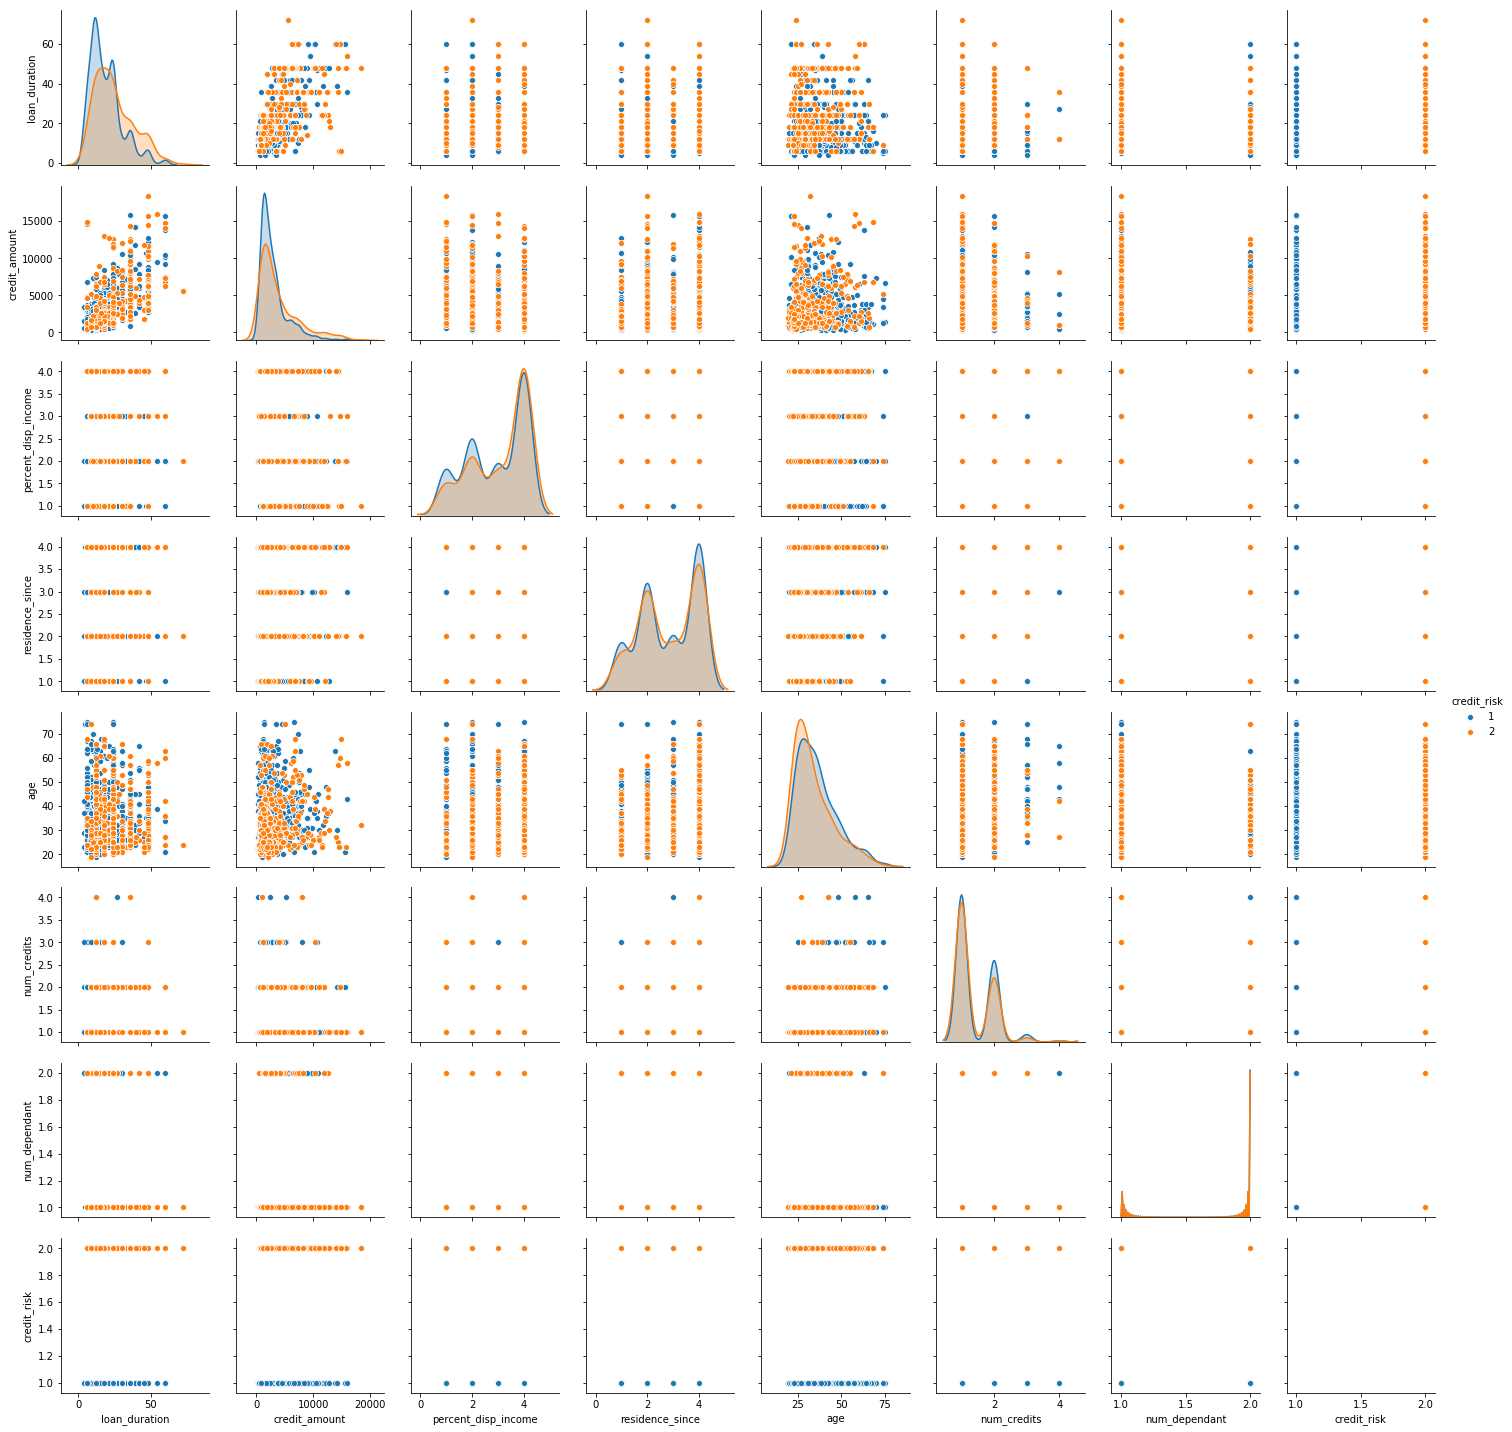

In [60]:
g = sns.pairplot(df4, hue="credit_risk")

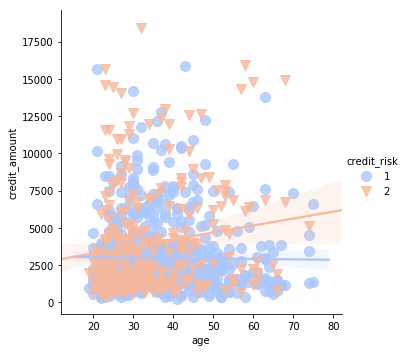

In [70]:
sns.lmplot(x='age',y='credit_amount',data=df4,hue='credit_risk',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

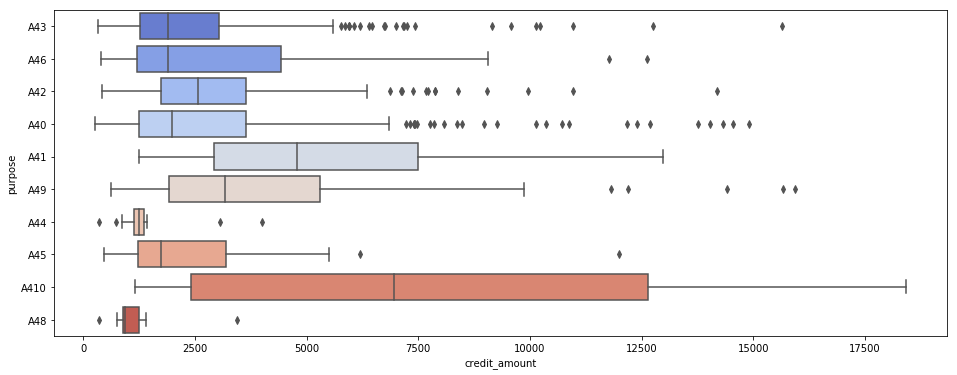

In [72]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='credit_amount',y='purpose',data=df4,palette='coolwarm')

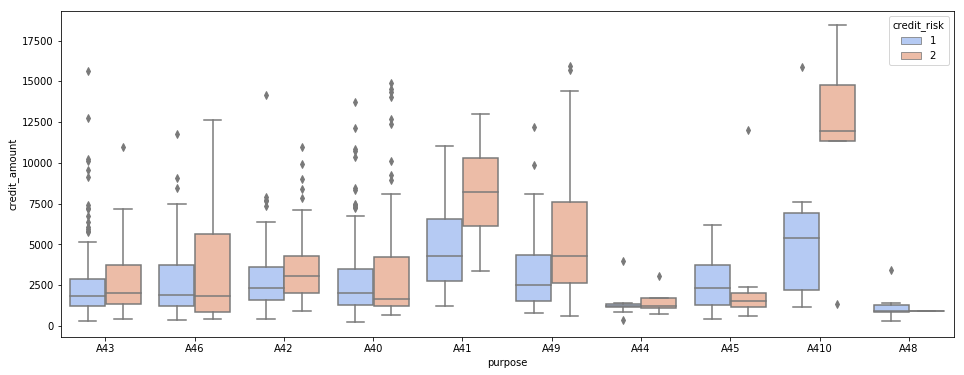

In [85]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="purpose", y="credit_amount", hue="credit_risk",data=df4, palette="coolwarm")

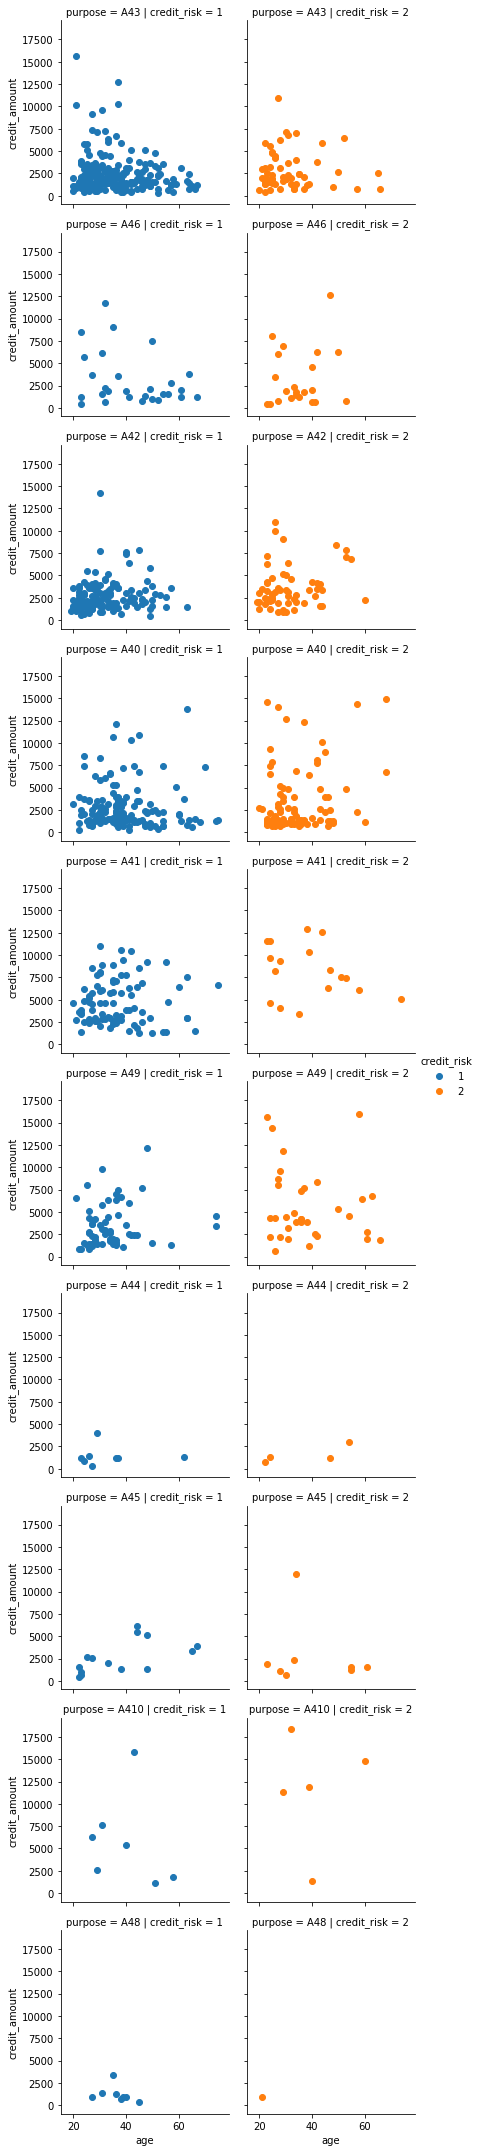

In [66]:
g = sns.FacetGrid(df4, col="credit_risk",  row="purpose",hue='credit_risk')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "age", "credit_amount").add_legend()p

In [ ]:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?fbclid=IwAR2cNL4A2ZELVudQsW8YZ0Fk5j2lQUdg59VUTLsNKdPUNBfcS92YRvwdWWY